# Loading MEG data with the `MNE` python package

I am interested in sleep data analysis, where one core informational source is neurophysiological data and in particular EEG data coming from polysomnigraphy.

MNE is a Python package designed particularly for this purpose. Below I outline how to install the package and how to load data with it.

## Install

Installation is relatively simple

`pip install mne`

We can also test the status of the package with the `info` method.

In [1]:
import mne
import os

In [2]:
 mne.sys_info()

Platform:      Linux-5.4.0-48-generic-x86_64-with-glibc2.10
Python:        3.8.5 (default, Sep  4 2020, 07:30:14)  [GCC 7.3.0]
Executable:    /home/andras/anaconda3/envs/sleep_data/bin/python
CPU:           x86_64: 8 cores
Memory:        Unavailable (requires "psutil" package)
mne:           0.21.0
numpy:         1.19.2 {blas=openblas, lapack=openblas}
scipy:         1.5.2
matplotlib:    3.3.1 {backend=module://ipykernel.pylab.backend_inline}

sklearn:       Not found
numba:         Not found
nibabel:       Not found
cupy:          Not found
pandas:        1.1.3
dipy:          Not found
mayavi:        Not found
pyvista:       Not found
vtk:           Not found


## Data Load

We can set the path to where we download the dataset.

In [3]:
mne.set_config('MNE_DATA', '~/MNE_DATA')


Here we use the sample dataset which has its own module.

First we generate the path where we will download the sample dataset.

In [4]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_folder

Archive exists (MNE-sample-data-processed.tar.gz), checking hash 12b75d1cb7df9dfb4ad73ed82f61094f.
Decompressing the archive: /home/andras/mne_data/MNE-sample-data-processed.tar.gz
(please be patient, this can take some time)
Successfully extracted to: ['/home/andras/mne_data/MNE-sample-data']


'/home/andras/mne_data/MNE-sample-data'

We specify the specific dataset we want to use.

In [5]:
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample','sample_audvis_filt-0-40_raw.fif')
sample_data_raw_file

'/home/andras/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif'

Then, we download and open the data (here I have it already)

In [6]:
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /home/andras/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


## Data overview

Basic information

In [7]:
print(raw)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.6 MB, data not loaded>


In [8]:
print(raw.info)

<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


And finally plotting the data

Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


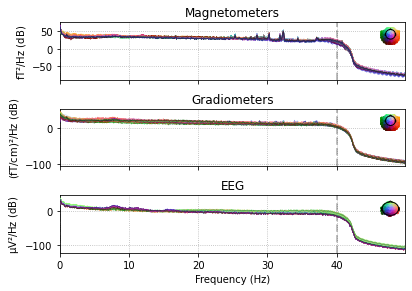

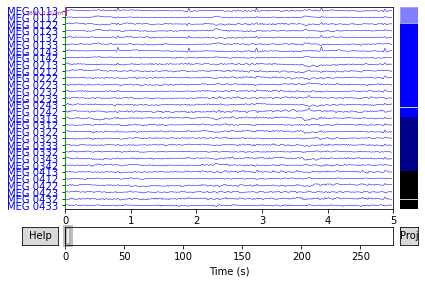

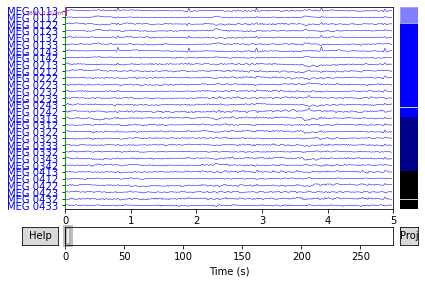

In [9]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)